<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/Python%202023/Caso_21_Distribuci%C3%B3n_de_probabilidad_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución de probabilidad normal

# Objetivo

Calcular probabilidades, valor esperado y variabildiad de datos de varibles aleatorias con comportamiento de distribución  normal.


# Descripción

- Se cargan librerías adecuadas
- Se cargan funciones adecuadas
- Se describen ejercicios extraídos de literatura de contexos diversos con caraterísticas de distribuciones normales.
- Se calculan probabilidades
- Se calculan valores esperados y variabilidad de los datos,
- Se calculan números aletorios
- Se calculan valores de variable aletoria $x$ a partir de probabilidades específicas


# Fundamento teórico

La distribución continua de probabilidad más importante en todo el campo de la estadística es la distribución normal. Su gráfica, que se denomina curva normal, es la curva con forma de campana .

La distribución normal a menudo se denomina distribución Gaussiana, en honor de Karl Friedrich Gauss (1777-1855), quien también derivó su ecuación a partir de un estudio de errores en mediciones repetidas de la misma cantidad [@walpole2012].

## Fórmula de densidad

$$
f(x) =\frac{1}{\sigma \cdot \sqrt{2 \cdot \pi}}\cdot e
^{\frac{-1}{2}\cdot ( \frac {x - \mu}{\sigma}) ^2}
$$

En donde: $π=3.14159$ y $e=2.71828$.

## Función de Distribución Acumulativa (CDF):

La CDF es una función que proporciona la probabilidad acumulativa de que una variable aleatoria sea menor o igual a un valor específico. Se denota como:
$$
F(x) = \int_{-∞}^{x}f(x)dx
$$

donde $f(x)$ es la PDF.

## Valor Esperado (Media)

El valor esperado de una variable aleatoria continua se calcula como el promedio ponderado de todos los valores posibles, donde el peso es dado por la PDF. Matemáticamente, se expresa como
$$
\mu_{x} = VE(x) = \int_{-\infty}^{\infty}x\cdot f(x)dx
$$

## Varianza y Desviación Estándar:

La varianza y la desviación estándar miden la dispersión de una variable aleatoria continua. La varianza se calcula como:

$$
varianza = \sigma^2=V(x)=\int_{-\infty}^{\infty}(x - \mu)^2\cdot f(x) dx
$$
, donde $\mu$ es la media, y la desviación estándar es la raíz cuadrada de la varianza

$$
\sigma = \sqrt{\sigma^2}
$$

## Funciones de python

En python se pueden utilizar las siguientes funciones para tratar con una distribución normal:

- *norm.rvs()* para calcular números aleatorios.
- *norm.pdf()* para calcular la densidad.
- *norm.cdf()* para calcular la probabilidad acumulada.
- *norm.ppf()* para calcular el valor de la a partir de una probabilidad, es la función inversa de *cdf()*.



# Desarrollo


## Cargar librerías

In [128]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd

## Cargar funciones

In [129]:
# Densidad normal
def f_x_normal(x, media, desv_std):
  # Calcular la PDF de la variable aleatoria continua
  fx = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
  return fx

# Función para visualizar la densidad de probabilidad de una distribución normal
def f_visualizar_dens_normal(valores):
    # Se calcula la media de los valores
    media = np.mean(valores)

    # Se calcula la desviacióne st´dnar de los valores
    desv_std = np.std(valores)

    # Crear un rango de valores para la crear una densidad
    x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std **2))

    # Visualizar la PDF
    plt.plot(x, pdf, label='Normal:(media:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))
    plt.title('Función de Densidad de Probabilidad (PDF) - Distribución Normal')
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend()
    # plt.grid(True)
    plt.show()

def f_visualizar_dens_area_normal(valores, a, b, prob=0, v_color = 'red'):
    # Se calcula la media de los valores
    media = np.mean(valores)

    # Se calcula la desviacióne st´dnar de los valores
    desv_std = np.std(valores)

    # Crear un rango de valores para la PDF
    x = np.linspace(media - 3 * desv_std, media + 3 * desv_std, 1000)

    # Calcular la PDF de la distribución normal
    pdf = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))

    # LA probailidad
    prob  = norm.cdf(b, media, desv_std) - norm.cdf(a, media, desv_std)
    # Visualizar la PDF
    plt.plot(x, pdf, label='Normal:(me:{}; ds:{})'.format(np.round(media, 2), np.round(desv_std, 2)))
    if prob == 0:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color=v_color, label='Área bajo la curva')
    else:
      plt.fill_between(x, 0, pdf, where=(x >= a) & (x <= b), alpha=0.3, color=v_color, label='Área '+str(a) + "-"+str(b)+"="+str(np.round(prob * 100, 2))+"%")

    plt.title('Función de Densidad de Probabilidad (PDF) - Distribución Normal')
    plt.xlabel('Valor de x')
    plt.ylabel('Densidad de Probabilidad')
    plt.legend(loc='upper right')
    # plt.grid(True)
    plt.show()

def f_visualizar_frecuencia(frecuencia):
  # Crear gráfico de barras
  plt.bar(frecuencia.index, frecuencia)

  # Agregar etiquetas y título
  plt.xlabel('Variable')
  plt.ylabel('Frecuencia')
  plt.title('Frecuencia en los Datos')

  # Mostrar el gráfico
  plt.show()

## Calcular una densidad para un valor de x

Ejemplo de calcular la densidad para un valor de $x$ de acuerdo a la distribución normal con media y desviación.

- Valor de x=70;
- media=80;
- desv=5;
- e=2.71828;
- pi=3.14159

Para el ejemplo siguiente se utilzia el cálcuo de la densidad manualemnte y luego con la función *norm.pdf()*; deben salir los mismos valores para un valor de $x = 70$, con media $\mu= 80$ y desviación estándar $\sigma= 5$


In [130]:
x = 18
media = 20
desv_std = 20
v_e = 2.71828
v_pi = 3.14159

densidad_1 = 1 / (desv_std * np.sqrt(2 * np.pi)) * np.exp(-(x - media)**2 / (2 * desv_std ** 2))
print ("La densidad de x = ", x, " es ", np.round(densidad_1, 4))

# Usando norm.pdf() de la librería norm
densidad_2 = norm.pdf(x, media, desv_std)
print ("La densidad de x = ", x, " es ", np.round(densidad_2, 4))

La densidad de x =  18  es  0.0198
La densidad de x =  18  es  0.0198


## Calcular números aleatorios

Se puede generar números aletorios mediante la función de la bilioteca *numpy* con la función *random.normal(media, desviación, size)*.

La función de generación de números aletorios requiere el valor de la media y la desviación de los datos así como la cantidad de números aleatorios a generar.

Ls siguiente instrucción genera 10 números aleatorios con media igual a $\mu = 80$ y desviación estándar de $\sigma = 5$

In [131]:
# Generar 10 números aleatorios de una distribución normal con media 0 y desviación estándar 1
num_aleatorios = np.random.normal(80, 5, 100)
print(np.round(num_aleatorios, 4))

[80.9323 84.1918 78.1358 73.7862 91.6986 82.7065 73.2541 68.7765 74.3033
 74.1248 73.7985 79.1449 77.96   87.2093 75.4223 85.9385 75.5492 76.4775
 65.9716 78.1811 81.6197 72.226  76.3262 75.752  83.1001 75.0497 85.6088
 80.4072 87.7028 79.1081 81.1258 86.6567 89.9123 87.9681 75.5554 83.5015
 74.444  80.687  75.0533 80.4306 90.2736 74.4043 78.033  78.1422 79.1913
 83.4142 75.1777 78.8261 73.2565 92.3876 89.7101 84.1025 83.9472 73.9146
 76.6494 82.2808 76.0969 85.4037 82.2864 86.7441 79.6089 72.2341 88.0902
 88.2074 74.0681 82.5471 83.8859 78.7617 87.2019 76.8634 80.1366 82.1357
 79.1193 81.9896 78.2653 77.5453 84.7348 87.2982 89.3273 89.6882 75.5943
 78.1122 78.4763 83.7385 78.4065 83.4545 77.6832 77.7744 84.0442 73.2728
 71.3681 85.7596 81.3764 77.1277 84.9065 85.0307 80.4955 69.9183 70.4353
 91.9316]


Se puede generar números aletorios mediante la función *norm.rvs(loc = 80, scale = 5, size = 10)* de la biblioteca scipi.stats.

Se generan 10 números aletorios con media igual a  $μ=80$  y desviación estándar de  $\sigma=5$

In [132]:
num_aleatorios = norm.rvs(loc = 80, scale = 5, size = 100)
print(np.round(num_aleatorios, 4))

[82.4078 83.7128 77.1583 77.3022 82.2094 76.9407 84.1463 86.3673 71.989
 74.0931 79.9804 80.7542 78.9964 78.3982 88.5851 76.2542 69.7501 76.4124
 84.4654 72.0239 91.1366 81.7048 76.855  85.2101 83.1655 89.4865 81.5099
 78.2938 79.7482 82.2163 79.5205 85.9527 74.8313 72.8535 85.5412 80.6604
 75.8946 76.3991 84.4957 77.4334 77.83   81.2258 84.2485 77.1092 83.3708
 74.5758 81.8144 77.6024 83.5708 86.499  87.1109 82.131  84.0548 82.1004
 90.301  89.7209 77.2545 79.7641 82.0608 75.8266 80.7159 80.0746 78.2046
 77.5493 74.842  80.0031 77.5883 86.5206 84.1271 72.8318 81.0706 80.4803
 86.7004 86.8124 87.6836 81.1592 86.1489 90.6783 77.6884 75.0421 86.6375
 81.6446 85.7171 78.5384 84.9585 79.2132 83.3597 71.9597 80.916  83.0468
 83.5323 77.8152 85.5699 82.3433 73.4104 76.1515 83.1369 82.3209 80.9284
 77.8883]


## Calcular la densidad de los números aleatorios

Se utiliza la función *f_x_normal()* previamente preparada para calcular la densidad de cada valor de números aletorios de acuerco con la fórmula de densidad de una distribución  normal.

Se calcula primero, la media y la desviación estándar de los datos.

In [133]:
media = np.mean(num_aleatorios)
desv_std = np.std(num_aleatorios)
densidad = f_x_normal(num_aleatorios, media, desv_std)
print ("La media de los números aleatorios es: ", np.round(media, 4))
print ("La desv. std de los números aleatorios es: ", np.round(desv_std, 4))
print("Las densidades: ")
print (np.round(densidad, 4))

La media de los números aleatorios es:  80.8804
La desv. std de los números aleatorios es:  4.6409
Las densidades: 
[0.0814 0.0714 0.0623 0.0639 0.0825 0.06   0.0671 0.0427 0.0137 0.0295
 0.0844 0.0859 0.0792 0.0745 0.0217 0.0523 0.0048 0.0541 0.0638 0.0139
 0.0075 0.0846 0.059  0.0556 0.0761 0.0154 0.0852 0.0736 0.0834 0.0825
 0.0824 0.0473 0.0368 0.0193 0.0519 0.0859 0.0483 0.0539 0.0635 0.0652
 0.0693 0.0857 0.0661 0.0618 0.0744 0.0342 0.0842 0.067  0.0727 0.0413
 0.0349 0.0829 0.068  0.083  0.011  0.014  0.0634 0.0835 0.0832 0.0475
 0.0859 0.0847 0.0728 0.0664 0.0369 0.0844 0.0668 0.0411 0.0673 0.0191
 0.0859 0.0856 0.0392 0.038  0.0294 0.0858 0.0451 0.0093 0.0679 0.039
 0.0398 0.0848 0.0499 0.0757 0.0584 0.0806 0.0745 0.0136 0.086  0.0771
 0.073  0.0691 0.0516 0.0818 0.0235 0.0511 0.0764 0.0819 0.086  0.0698]


## Visualizar densidad

Con los valores de los números aleatorios generados y la densidad de los mismos, se visualiza la curva de campana de la distribución  normal.

Se utiliza la función previamente codificada para mostar la densidad de la distribucuón normal *f_visualizar_dens_normal(valores, media, desviacion_estandar)*.



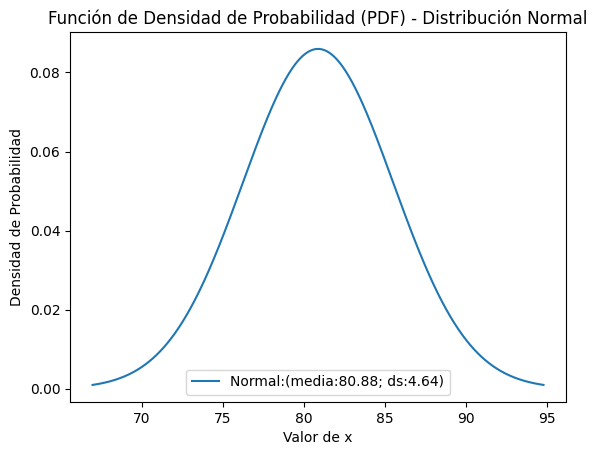

In [134]:
f_visualizar_dens_normal(num_aleatorios)

## Calcular probabilidades

Ahora bien con una densidad calculada de cada uno de los valores aleatrios generdos, ahora se puede calcular probabildia bajo un inetrvalo.

¿Cuál es la probabilidad de encontrar números entre 80 y 85?

$$
F(80 \le x \le 85)
$$

$$
F(x \le 85) - F(x \le 80)
$$

Se utiliza la función *norm.cdf()*, restando la probabilidad acumulada de 85 menos la probabilidad acumulada de 80.

In [135]:
x1 = 80
x2 = 85
probabilidad  = norm.cdf(x2, media, desv_std) - norm.cdf(x1, media, desv_std)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamnte ", np.round(probabilidad * 100, 2))

La probabilidad entre  80  y  85  es 0.3879 aproximadamnte  38.79


## Visualizar probabildiades

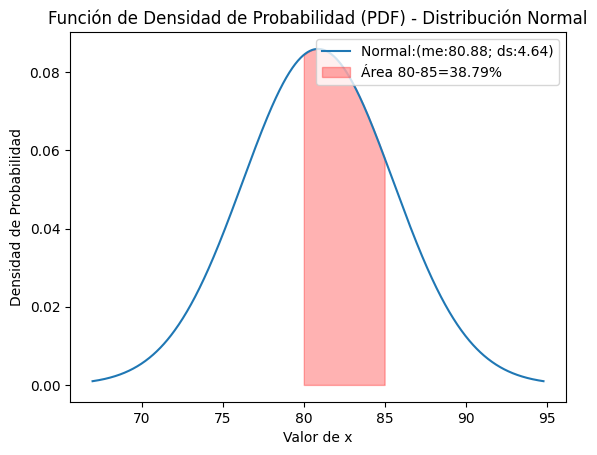

In [136]:
f_visualizar_dens_area_normal(num_aleatorios, x1, x2)

## Ejercicio estaturas pesos y generos de personas

Se carga un archivo con extensión *csv* que contiene medidas de personas. Las variables de interés son estatura en centímetros, peso en kilogramos y género que puede ser Hombre o Mujer.


### Cargar datos y análisis descriptivo

Se cargan datos y se presenta un análisis descriptivo de la cantidad de registros ,los estadísticos básicos de las variables estatura y peso así como la frecuencia por género.

Son $n=507$ registros de los cuales hay $260$ mujeres y $247$ hombres.

La media aritmética de la variable estatura es $171.14$ con desviación estándar de $9.40$; la media de la variable peso es $69.14$ con desviación estándar de $13.34$

     estatura  peso genero_cat
0       174.0  65.6     Hombre
1       175.3  71.8     Hombre
2       193.5  80.7     Hombre
3       186.5  72.6     Hombre
4       187.2  78.8     Hombre
..        ...   ...        ...
502     176.5  71.8      Mujer
503     164.4  55.5      Mujer
504     160.7  48.6      Mujer
505     174.0  66.4      Mujer
506     163.8  67.3      Mujer

[507 rows x 3 columns]
         estatura        peso
count  507.000000  507.000000
mean   171.143787   69.147535
std      9.407205   13.345762
min    147.200000   42.000000
25%    163.800000   58.400000
50%    170.300000   68.200000
75%    177.800000   78.850000
max    198.100000  116.400000
Mujer     260
Hombre    247
Name: genero_cat, dtype: int64


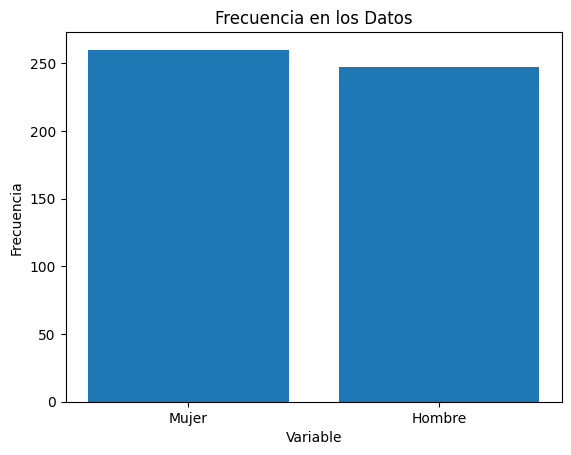

In [137]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/probabilidad-y-estad-stica/master/2023/datos/estatura%20peso%20generos.csv")
print(datos[['estatura', 'peso', 'genero_cat']])

print(datos[['estatura', 'peso']].describe())
# Determinar la frecuencia de cada atributo en la columna 'genero'
frecuencia_genero = datos['genero_cat'].value_counts()

# Imprimir la frecuencia
print(frecuencia_genero)

f_visualizar_frecuencia(frecuencia_genero)


### Probabilidades con datos del género hombres

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura mayor que 180 centímetros?



In [138]:
# Filtrar datos para obtener solo los hombres
 #datos_hombres = datos[datos['genero'] == 'Hombre']
datos_hombres = datos.query("genero_cat == 'Hombre'")
#print(datos_hombres['estatura'])
# Media estatura de hombres
media_est_hombres = np.mean(datos_hombres['estatura'])
desv_std_est_hombres = np.std(datos_hombres['estatura'])
print ("La media de estatura hombres", np.round(media_est_hombres, 4))
print ("La desviación estándar de estatura hombres", np.round(desv_std_est_hombres, 4))

La media de estatura hombres 177.7453
La desviación estándar de estatura hombres 7.1691


Con los estadístico de media y desviacón estándar y los valores, visualizar la densidad y el área de hombre con estatura maypr que $180$.

$$
F(x \ge 180)
$$

Restar:

$$
1 - F(x \le 180)
$$

para determinar los que están o son mayores que $180$.


La probabilidad entre  180  y  inf  es 0.3766 aproximadamente  37.66


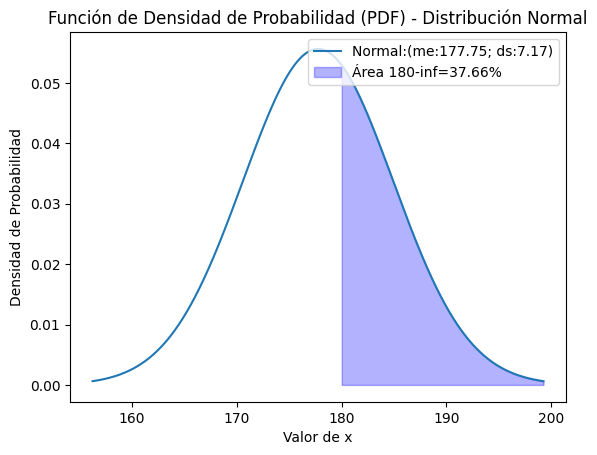

In [139]:
x1 = 180
x2 = np.Inf
probabilidad  = 1 - norm.cdf(x1, media_est_hombres, desv_std_est_hombres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_hombres['estatura'], x1, x2, v_color = 'blue')

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura entre 160 y 180 centímetros?

$$
F(160 \le x \le 180)
$$

Restar:

$$
F(x \le 180) - F(x \le 160)
$$

para determinar los que están en el intervalo $160$ - $180$

La probabilidad entre  160  y  180  es 0.6168 aproximadamente  61.68


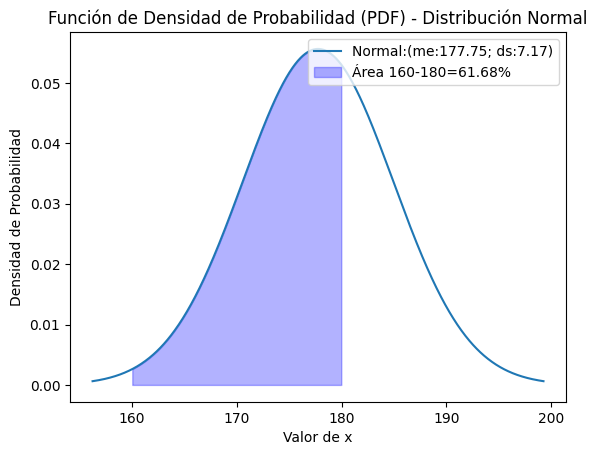

In [140]:
x1 = 160
x2 = 180
probabilidad  = norm.cdf(x2, media_est_hombres, desv_std_est_hombres) - norm.cdf(x1, media_est_hombres, desv_std_est_hombres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_hombres['estatura'], x1, x2, v_color = 'blue')

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura menor o igual a 165 centímetros?

$$
F(x \le 165)
$$

para determinar los que están en el intervalo por debajo de $165$

La probabilidad entre  -inf  y  165  es 0.0377 aproximadamente  3.77


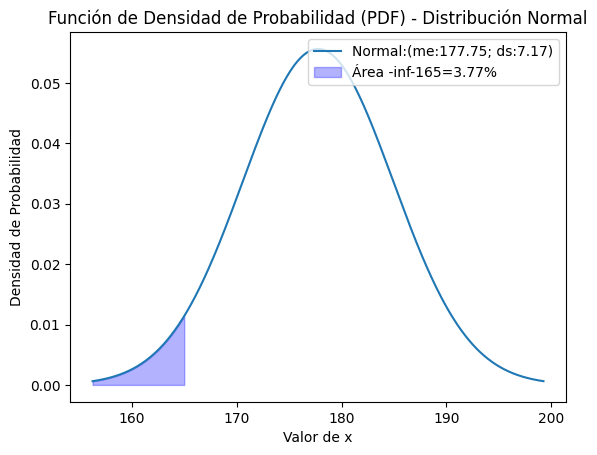

In [141]:
x1 = - np.Inf
x2 = 165
probabilidad  = norm.cdf(x2, media_est_hombres, desv_std_est_hombres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_hombres['estatura'], x1, x2, v_color = 'blue')

### Probabilidade con datos del género mujeres


#### ¿Cúal es la probabilidad de encontrar personas del género mujeres con estatura mayor que 180 centímetros?

In [142]:
# Filtrar datos para obtener solo las mujeres
datos_mujeres = datos.query("genero_cat == 'Mujer'")

# Media estatura de mujeres
media_est_mujeres = np.mean(datos_mujeres['estatura'])
desv_std_est_mujeres = np.std(datos_mujeres['estatura'])
print ("La media de estatura mujeres", np.round(media_est_mujeres, 4))
print ("La desviación estándar de estatura mujeres", np.round(desv_std_est_mujeres, 4))

La media de estatura mujeres 164.8723
La desviación estándar de estatura mujeres 6.532


Con los estadístico de media y desviacón estándar y los valores, visualizar la densidad y el área de la probabilidad con estatura mayr que $180$ en mujeres:

La probabilidad entre  180  y  inf  es 0.0103 aproximadamente  1.03


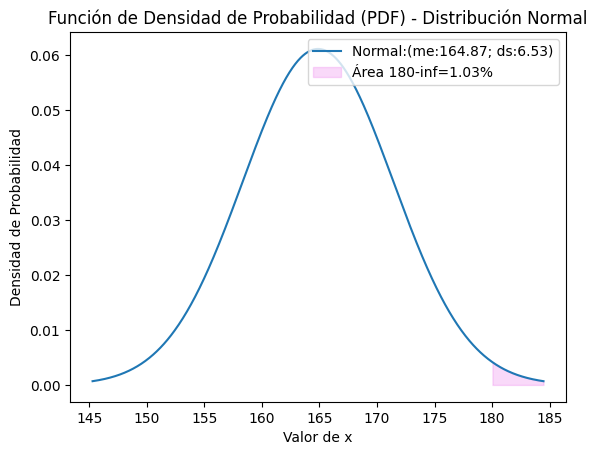

In [143]:
x1 = 180
x2 = np.Inf
probabilidad  = 1 - norm.cdf(x1, media_est_mujeres, desv_std_est_mujeres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_mujeres['estatura'], x1, x2, v_color = 'violet')

#### ¿Cúal es la probabilidad de encontrar personas del género mujeres con estatura entre 160 y 180 centímetros?



La probabilidad entre  160  y  180  es 0.7619 aproximadamente  76.19


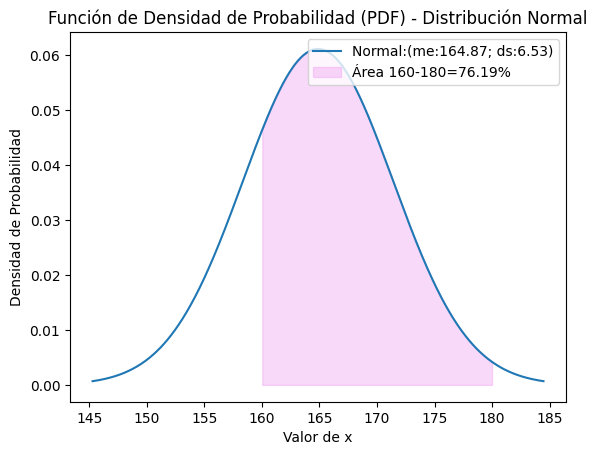

In [144]:
x1 = 160
x2 = 180
probabilidad  = norm.cdf(x2, media_est_mujeres, desv_std_est_mujeres) - norm.cdf(x1, media_est_mujeres, desv_std_est_mujeres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_mujeres['estatura'], x1, x2, v_color = 'violet')

#### ¿Cúal es la probabilidad de encontrar personas del género hombres con estatura menor o igual a 165 centímetros?

La probabilidad entre  -inf  y  165  es 0.5078 aproximadamente  50.78


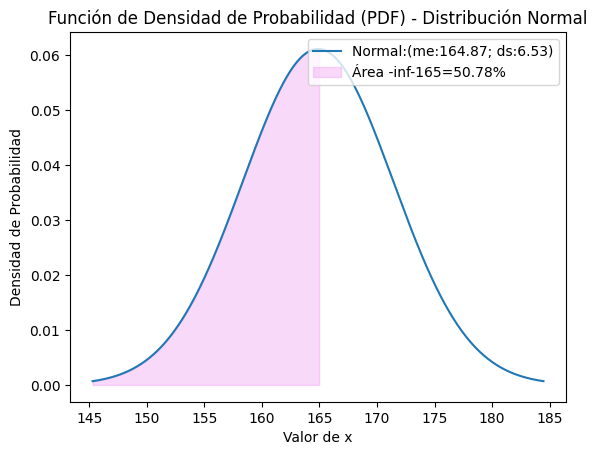

In [145]:
x1 = - np.Inf
x2 = 165
probabilidad  = norm.cdf(x2, media_est_mujeres, desv_std_est_mujeres)
print ("La probabilidad entre ", x1, " y ", x2, " es", np.round(probabilidad, 4), "aproximadamente ", np.round(probabilidad * 100, 2))
f_visualizar_dens_area_normal(datos_mujeres['estatura'], x1, x2, v_color = 'violet')

### Con respecto al peso de las personas hombre y mujeres

####  Con repecto al peso en kilogramos de los hombres

- ¿Cuál es la probabilidad de encontrar hombres con un peso coporal superior a $80$ kilogramos; $1 - F(x \le 80)$
- ¿Cual es la probabilidad de encontrar hombres con un peso corporal entre $70$ y $75$ kilogramos?; $F(70 \le x \le 75)$
- ¿Cuál es la probabilidad de encontrar hombres que pesen menos de $65$ kilogramos?; $F(x \le 65)$

####  Con repecto al peso en kilogramos de las mujeres

- ¿Cuál es la probabilidad de encontrar mujeres con un peso coporal superior a $80$ kilogramos; $1 - F(x \le 80)$
- ¿Cual es la probabilidad de encontrar mujeres con un peso corporal entre $70$ y $75$ kilogramos?; $F(70 \le x \le 75)$
- ¿Cuál es la probabilidad de encontrar mujeres que pesen menos de $65$ kilogramos?; $F(x \le 65)$



# Interpretación del caso

Con los datos de estatura y peso corporal de personas cargados en el caso:

- ¿Qué es más probable: encontrar hombres por que midan por encima del $180$ centímetros de estatura o mujeres por encima del $180$ centímetros de estatura?, Con las probabilidades calculadas responda la pregunta. **Resp**: Existe una probabilidad del $37$% de encontrar hombres con estatura superior al 180 centímetros en relación al $1.03$% de encontrar mujeres por encima del $180$ centímetros de estatura por lo que es más probable que se dé la primera aseveración.

- ¿Qué es más probable: encontrar hombres por que midan por debajo o igual a $165$ centímetros de estatura o mujeres por debajo o igual a $165$ centímetros de estatura?, Con las probabilidades calculadas responda la pregunta. Es más probable encontrar mujeres con estatura por debajo del $165$ centímeros con el $50.78$% aproximadamente en relación al $3.77$% de encontrar hombres por debajo de $165$ centímetros aproximadamente.

Las probabilidades se calcularon en relación a los datos cargados.

- ¿Qué es más probable, encontrar hombres con peso superior a $80$ kilogramos o mujeres con peso superior a $80$ kilogramos?; con las probabilidades calculadas se responde la pregunta.

- Qué es más probable, encontrar hombres con un peso corporal menor a $65$ kilogramos o mujeres con peso corporal menor a $65$ kilogramos?. Con las probabilidades calculadas se responde la pregunta.




# Bibliografía

- UC3M. n.d. “Introducción a La Estadística y Probabilidad.” http://halweb.uc3m.es/esp/Personal/personas/mwiper/docencia/Spanish/Introduction_to_Statistics/intro_continuous2.pdf.

- Walpole, Ronald E., Raymond H. Myers, and Sharon L. Myers. 2012. Probabilidad y Estadística Para Ingeniería y Ciencias. Novena Edición. México: Pearson.